### 온라인 sales로 판매 실적 수익률 RFM

- 매출 분석, 고객 세분화
- 지리적 분석 : 지리적 위치에 따른 구매 패턴을 분석하였습니다
- 판매 실적: 고객들의 성별과 나이에 대한 판매 실적을 분석하였습니다.

In [1]:
import pandas as pd

po_df = pd.read_csv('./datasets/products_online_sales_updated.csv')
po_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00 UTC,3.39,United Kingdom
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00 UTC,7.65,United Kingdom
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00 UTC,2.75,United Kingdom
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00 UTC,3.39,United Kingdom
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00 UTC,4.25,United Kingdom
...,...,...,...,...,...,...,...,...
396365,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00 UTC,4.95,France
396366,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00 UTC,4.15,France
396367,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00 UTC,1.65,France
396368,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00 UTC,1.95,France


In [2]:
po_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396370 entries, 0 to 396369
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396370 non-null  int64  
 1   CustomerID   396370 non-null  int64  
 2   StockCode    396370 non-null  object 
 3   Description  396370 non-null  object 
 4   Quantity     396370 non-null  int64  
 5   InvoiceDate  396370 non-null  object 
 6   UnitPrice    396370 non-null  float64
 7   Country      396370 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 24.2+ MB


In [3]:
# 년 월 일로 바꾸기
po_df['InvoiceDate'] = pd.to_datetime(po_df['InvoiceDate']).dt.strftime('%Y-%m-%d')

In [4]:
po_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,United Kingdom
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,United Kingdom
...,...,...,...,...,...,...,...,...
396365,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,France
396366,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,France
396367,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09,1.65,France
396368,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09,1.95,France


In [5]:
po_df['InvoiceDate'] = pd.to_datetime(po_df['InvoiceDate'])

In [6]:
po_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396370 entries, 0 to 396369
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396370 non-null  int64         
 1   CustomerID   396370 non-null  int64         
 2   StockCode    396370 non-null  object        
 3   Description  396370 non-null  object        
 4   Quantity     396370 non-null  int64         
 5   InvoiceDate  396370 non-null  datetime64[ns]
 6   UnitPrice    396370 non-null  float64       
 7   Country      396370 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 24.2+ MB


In [7]:
# 전처리 검사
# 결측치는 없습니다.
po_df.isna().sum()

InvoiceNo      0
CustomerID     0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [8]:
po_df.duplicated().sum()

5188

In [9]:
po_df.drop_duplicates(inplace=True)

In [10]:
po_df.sort_values(by='InvoiceDate', ascending=False)

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
396369,581587,12680,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,France
395965,581495,14051,23173,REGENCY TEAPOT ROSES,6,2011-12-09,9.95,United Kingdom
395963,581495,14051,21877,HOME SWEET HOME MUG,12,2011-12-09,1.65,United Kingdom
395962,581495,14051,48138,DOORMAT UNION FLAG,10,2011-12-09,7.08,United Kingdom
395961,581494,12518,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2011-12-09,2.95,Germany
...,...,...,...,...,...,...,...,...
1302,536534,15350,22867,HAND WARMER BIRD DESIGN,12,2010-12-01,2.10,United Kingdom
1303,536534,15350,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-12-01,4.95,United Kingdom
1304,536534,15350,22834,HAND WARMER BABUSHKA DESIGN,12,2010-12-01,2.10,United Kingdom
1305,536534,15350,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-12-01,2.10,United Kingdom


In [11]:
po_df = po_df.reset_index(drop=True)
po_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,United Kingdom
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,United Kingdom
...,...,...,...,...,...,...,...,...
391177,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,France
391178,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,France
391179,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09,1.65,France
391180,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09,1.95,France


In [12]:
# Quantity 0보단 낮은거 없앴습니다.
ci_rf_df = po_df[po_df['Quantity'] >= 0]
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,United Kingdom
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,United Kingdom
...,...,...,...,...,...,...,...,...
391177,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,France
391178,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,France
391179,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09,1.65,France
391180,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09,1.95,France


In [13]:
ci_rf_df.loc[:, 'Recency'] = pd.to_datetime(po_df['InvoiceDate'])\
                    .apply(lambda x: (pd.to_datetime('2011-12-09') - x).days)
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Recency
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,373
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,United Kingdom,373
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom,373
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom,373
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
391177,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,France,0
391178,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,France,0
391179,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09,1.65,France,0
391180,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09,1.95,France,0


In [14]:
ci_rf_df['InvoiceDate'] = ci_rf_df['Recency']
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Recency
0,536365,17850,71053,WHITE METAL LANTERN,6,373,3.39,United Kingdom,373
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,373,7.65,United Kingdom,373
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,373,2.75,United Kingdom,373
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,373,3.39,United Kingdom,373
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,373,4.25,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
391177,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,0,4.95,France,0
391178,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,0,4.15,France,0
391179,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,0,1.65,France,0
391180,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,0,1.95,France,0


In [15]:
# CustomerID를 기준으로 그룹화하여 Quantity를 합산합니다.
rf_df = ci_rf_df.groupby('CustomerID').agg(Recency=('Recency', 'min'), Frequency=('CustomerID', 'count'))
rf_df

,Recency,Frequency
CustomerID,,
12346,325,1
12347,2,182
12348,75,27
12349,18,72
12350,310,16
...,...,...
18280,277,10
18281,180,7
18282,7,12


In [16]:
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Recency
0,536365,17850,71053,WHITE METAL LANTERN,6,373,3.39,United Kingdom,373
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,373,7.65,United Kingdom,373
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,373,2.75,United Kingdom,373
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,373,3.39,United Kingdom,373
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,373,4.25,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
391177,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,0,4.95,France,0
391178,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,0,4.15,France,0
391179,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,0,1.65,France,0
391180,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,0,1.95,France,0


In [17]:
m_df = ci_rf_df.copy()
m_df.loc[:, 'Monetary'] = po_df['Quantity'] * po_df['UnitPrice']
m_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Recency,Monetary
0,536365,17850,71053,WHITE METAL LANTERN,6,373,3.39,United Kingdom,373,20.34
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,373,7.65,United Kingdom,373,15.30
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,373,2.75,United Kingdom,373,22.00
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,373,3.39,United Kingdom,373,20.34
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,373,4.25,United Kingdom,373,25.50
...,...,...,...,...,...,...,...,...,...,...
391177,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,0,4.95,France,0,14.85
391178,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,0,4.15,France,0,16.60
391179,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,0,1.65,France,0,19.80
391180,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,0,1.95,France,0,15.60


In [18]:
m_df = m_df.groupby('CustomerID')[['Monetary']].sum()
m_df

,Monetary
CustomerID,
12346,77183.60
12347,4310.00
12348,1437.24
12349,1457.55
12350,294.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [19]:
rf_df = rf_df.reset_index()
rf_df

,CustomerID,Recency,Frequency
0,12346,325,1
1,12347,2,182
2,12348,75,27
3,12349,18,72
4,12350,310,16
...,...,...,...
4330,18280,277,10
4331,18281,180,7
4332,18282,7,12
4333,18283,3,719


In [20]:
m_df = m_df.reset_index()
m_df

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1437.24
3,12349,1457.55
4,12350,294.40
...,...,...
4330,18280,180.60
4331,18281,80.82
4332,18282,178.05
4333,18283,2039.58


In [21]:
rfm_df = rf_df.merge(m_df, on='CustomerID')
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,27,1437.24
3,12349,18,72,1457.55
4,12350,310,16,294.40
...,...,...,...,...
4330,18280,277,10,180.60
4331,18281,180,7,80.82
4332,18282,7,12,178.05
4333,18283,3,719,2039.58


In [22]:
rfm_df.iloc[rfm_df[rfm_df['Monetary'] < 0].index] = 0
rfm_df[rfm_df['Monetary'] < 0]

,CustomerID,Recency,Frequency,Monetary


In [23]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,27,1437.24
3,12349,18,72,1457.55
4,12350,310,16,294.40
...,...,...,...,...
4330,18280,277,10,180.60
4331,18281,180,7,80.82
4332,18282,7,12,178.05
4333,18283,3,719,2039.58


In [24]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [25]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,0.871314,0.000000,0.276507
1,12347,0.005362,0.023611,0.015440
2,12348,0.201072,0.003392,0.005149
3,12349,0.048257,0.009262,0.005222
4,12350,0.831099,0.001957,0.001055
...,...,...,...,...
4330,18280,0.742627,0.001174,0.000647
4331,18281,0.482574,0.000783,0.000290
4332,18282,0.018767,0.001435,0.000638
4333,18283,0.008043,0.093660,0.007307


In [26]:
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Recency
0,536365,17850,71053,WHITE METAL LANTERN,6,373,3.39,United Kingdom,373
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,373,7.65,United Kingdom,373
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,373,2.75,United Kingdom,373
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,373,3.39,United Kingdom,373
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,373,4.25,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
391177,581587,12680,22138,BAKING SET 9 PIECE RETROSPOT,3,0,4.95,France,0
391178,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,4,0,4.15,France,0
391179,581587,12680,22556,PLASTERS IN TIN CIRCUS PARADE,12,0,1.65,France,0
391180,581587,12680,22367,CHILDRENS APRON SPACEBOY DESIGN,8,0,1.95,France,0


In [27]:
rfm_df['Recency'] = 1 - rfm_df['Recency']

In [28]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,0.128686,0.000000,0.276507
1,12347,0.994638,0.023611,0.015440
2,12348,0.798928,0.003392,0.005149
3,12349,0.951743,0.009262,0.005222
4,12350,0.168901,0.001957,0.001055
...,...,...,...,...
4330,18280,0.257373,0.001174,0.000647
4331,18281,0.517426,0.000783,0.000290
4332,18282,0.981233,0.001435,0.000638
4333,18283,0.991957,0.093660,0.007307


In [29]:
rfm_df.loc[:, 'TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']
rfm_df

,CustomerID,Recency,Frequency,Monetary,TotalScore
0,12346,0.128686,0.000000,0.276507,0.405193
1,12347,0.994638,0.023611,0.015440,1.033689
2,12348,0.798928,0.003392,0.005149,0.807468
3,12349,0.951743,0.009262,0.005222,0.966226
4,12350,0.168901,0.001957,0.001055,0.171912
...,...,...,...,...,...
4330,18280,0.257373,0.001174,0.000647,0.259194
4331,18281,0.517426,0.000783,0.000290,0.518498
4332,18282,0.981233,0.001435,0.000638,0.983306
4333,18283,0.991957,0.093660,0.007307,1.092924


In [30]:
ci_rf_df = po_df.merge(rfm_df[['CustomerID', 'TotalScore']], on='CustomerID')
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalScore
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,0.060607
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,United Kingdom,0.060607
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom,0.060607
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom,0.060607
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,United Kingdom,0.060607
...,...,...,...,...,...,...,...,...,...
391177,581578,12713,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,Germany,1.007543
391178,581578,12713,21918,SET 12 KIDS COLOUR CHALK STICKS,24,2011-12-09,0.42,Germany,1.007543
391179,581578,12713,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09,1.25,Germany,1.007543
391180,581578,12713,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09,1.25,Germany,1.007543


In [31]:
import numpy as np

l1, l2, l3, l4 = np.percentile(ci_rf_df['TotalScore'], [20, 40, 75, 90])
print(l1, l2, l3, l4)

0.8688695153525402 0.9692465816710412 1.0598582382091477 1.240542183323837


In [32]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [33]:
ci_rf_df['Level'] = ci_rf_df['TotalScore'].apply(get_level)
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalScore,Level
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,0.060607,5
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,United Kingdom,0.060607,5
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom,0.060607,5
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom,0.060607,5
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,United Kingdom,0.060607,5
...,...,...,...,...,...,...,...,...,...,...
391177,581578,12713,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,Germany,1.007543,3
391178,581578,12713,21918,SET 12 KIDS COLOUR CHALK STICKS,24,2011-12-09,0.42,Germany,1.007543,3
391179,581578,12713,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09,1.25,Germany,1.007543,3
391180,581578,12713,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09,1.25,Germany,1.007543,3


In [34]:
ci_rf_df['Level'] = ci_rf_df['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

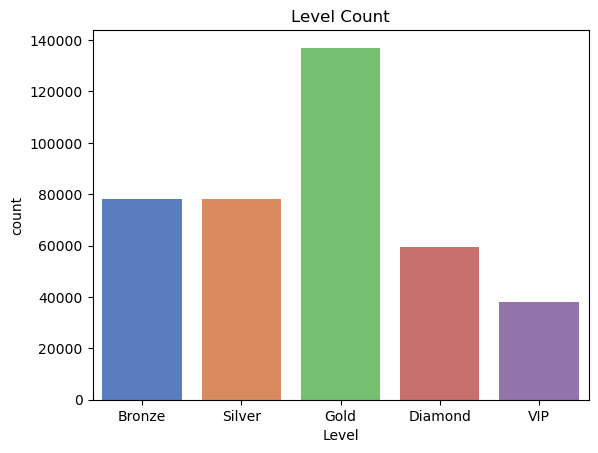

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x = 'Level', data=ci_rf_df, palette='muted', order=order)
plt.title('Level Count')
plt.show()

In [36]:
ci_rf_df

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalScore,Level
0,536365,17850,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,0.060607,Bronze
1,536365,17850,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,United Kingdom,0.060607,Bronze
2,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom,0.060607,Bronze
3,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom,0.060607,Bronze
4,536365,17850,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,United Kingdom,0.060607,Bronze
...,...,...,...,...,...,...,...,...,...,...
391177,581578,12713,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,Germany,1.007543,Gold
391178,581578,12713,21918,SET 12 KIDS COLOUR CHALK STICKS,24,2011-12-09,0.42,Germany,1.007543,Gold
391179,581578,12713,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09,1.25,Germany,1.007543,Gold
391180,581578,12713,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09,1.25,Germany,1.007543,Gold


<Axes: xlabel='Level', ylabel='TotalScore'>

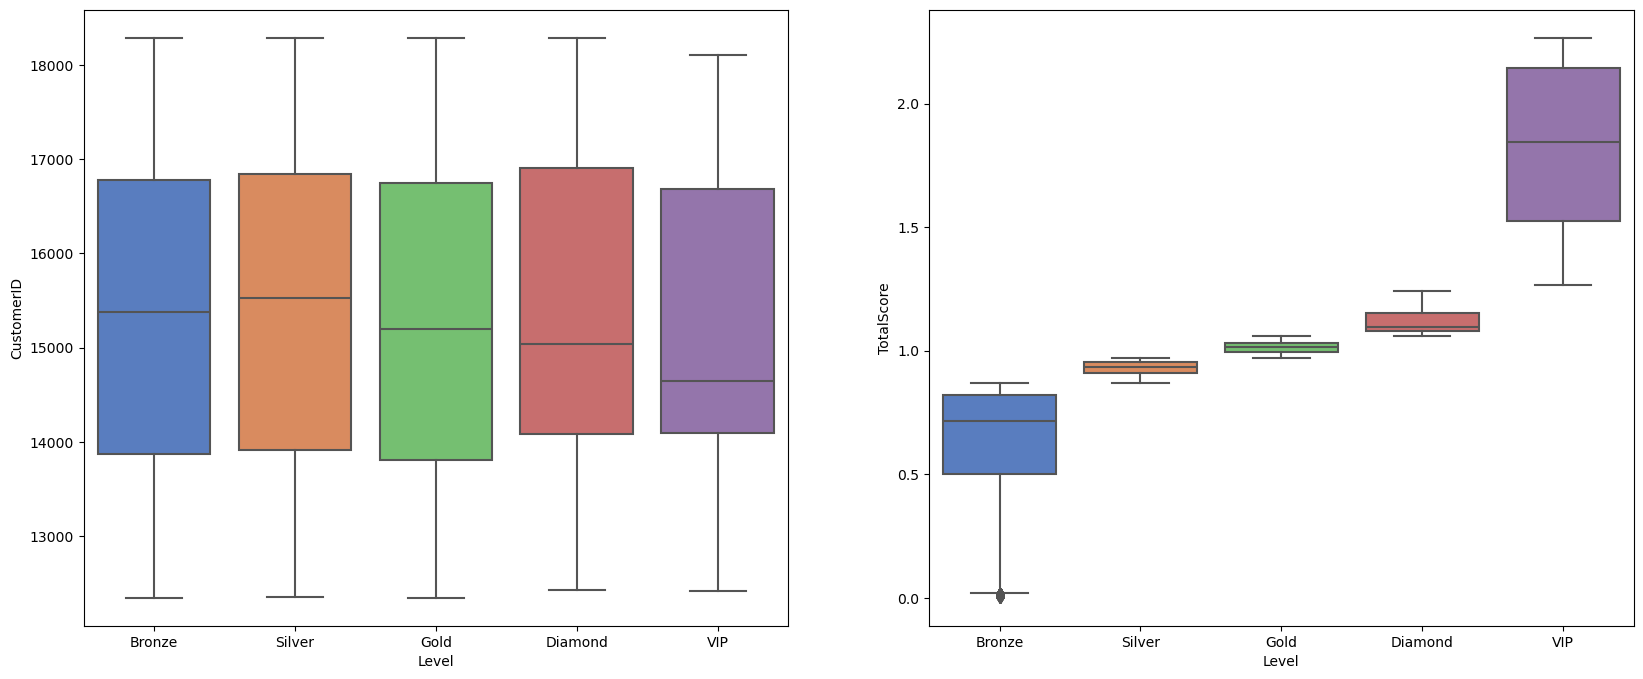

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 어떤 고객 ID가 어떤 레벨인지 알고 싶었습니다.
sns.boxplot(ax=axes[0], x='Level', y='CustomerID', data=ci_rf_df, palette='muted', order=order_columns)

# 레벨마다 결제 금액은 어느정도 일지 궁금하다
sns.boxplot(ax=axes[1], x='Level', y='TotalScore', data=ci_rf_df, palette='muted', order=order_columns)

In [38]:
ci_rf_df['Country'].value_counts()

Country
United Kingdom          348891
Germany                   8644
France                    8019
EIRE                      7128
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1811
Portugal                  1416
Australia                 1183
Norway                    1049
Channel Islands            743
Italy                      741
Finland                    647
Cyprus                     601
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     245
Unspecified                241
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45


In [39]:
top_countries = ['United Kingdom', 'Germany', 'France', 'EIRE']
ci_rf_df.loc[~ci_rf_df['Country'].isin(top_countries), 'Country'] = 'Others'

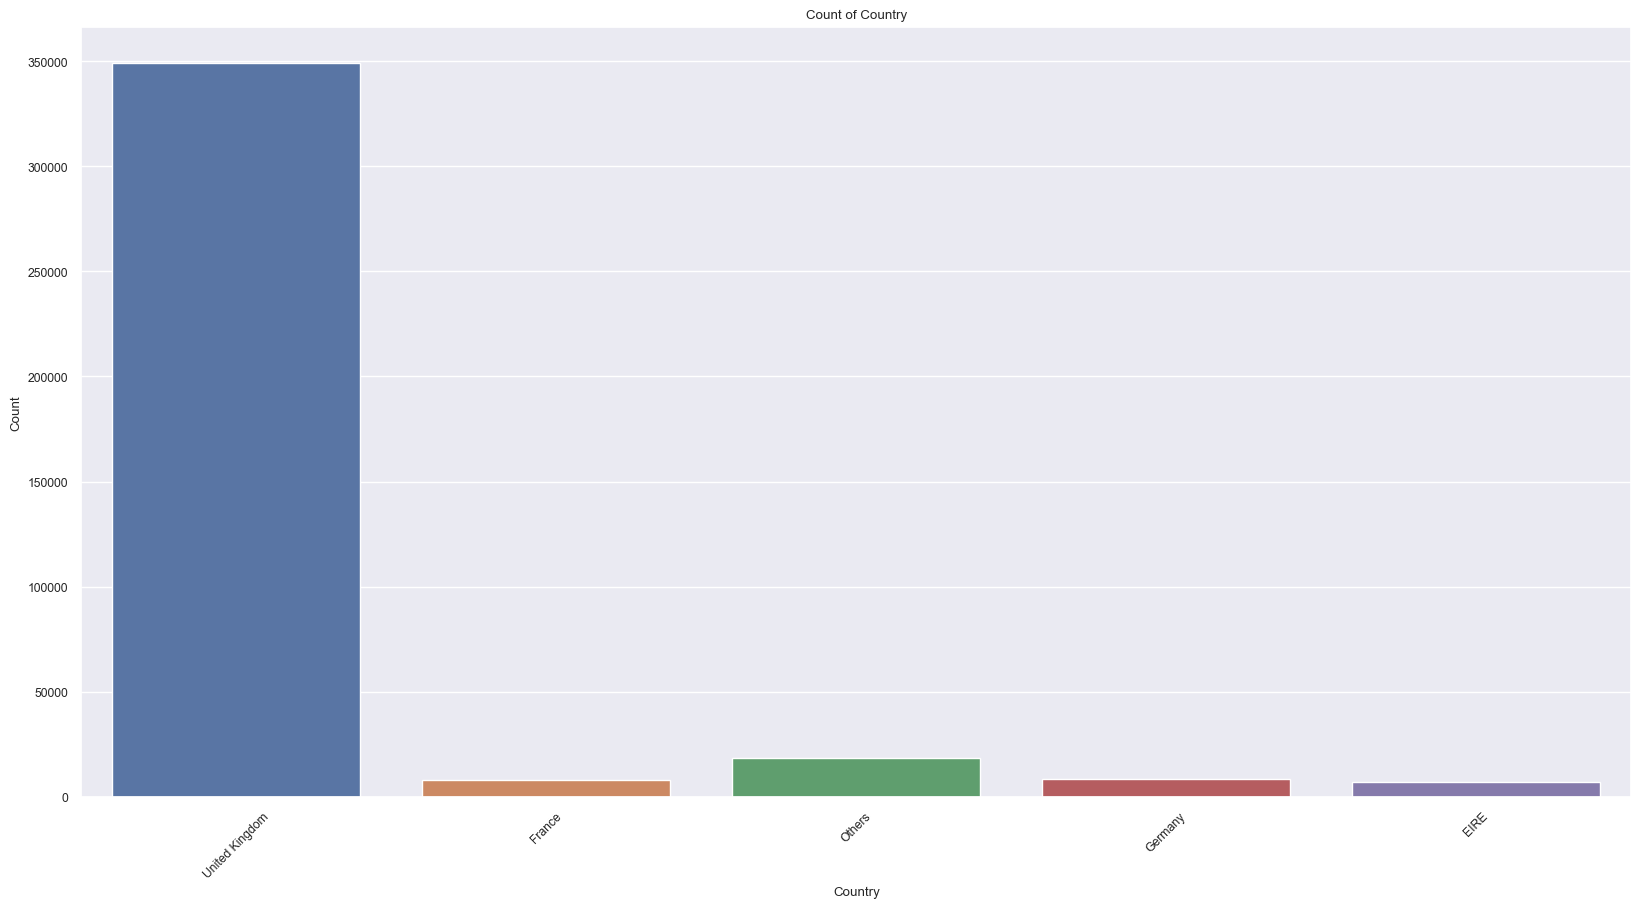

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 어떤 나라가 많이 샀는지에 대한 그래프

# 전체 구매 목록 그래프
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 10))
sns.countplot(x='Country', data=ci_rf_df)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Country')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Country', ylabel='count'>

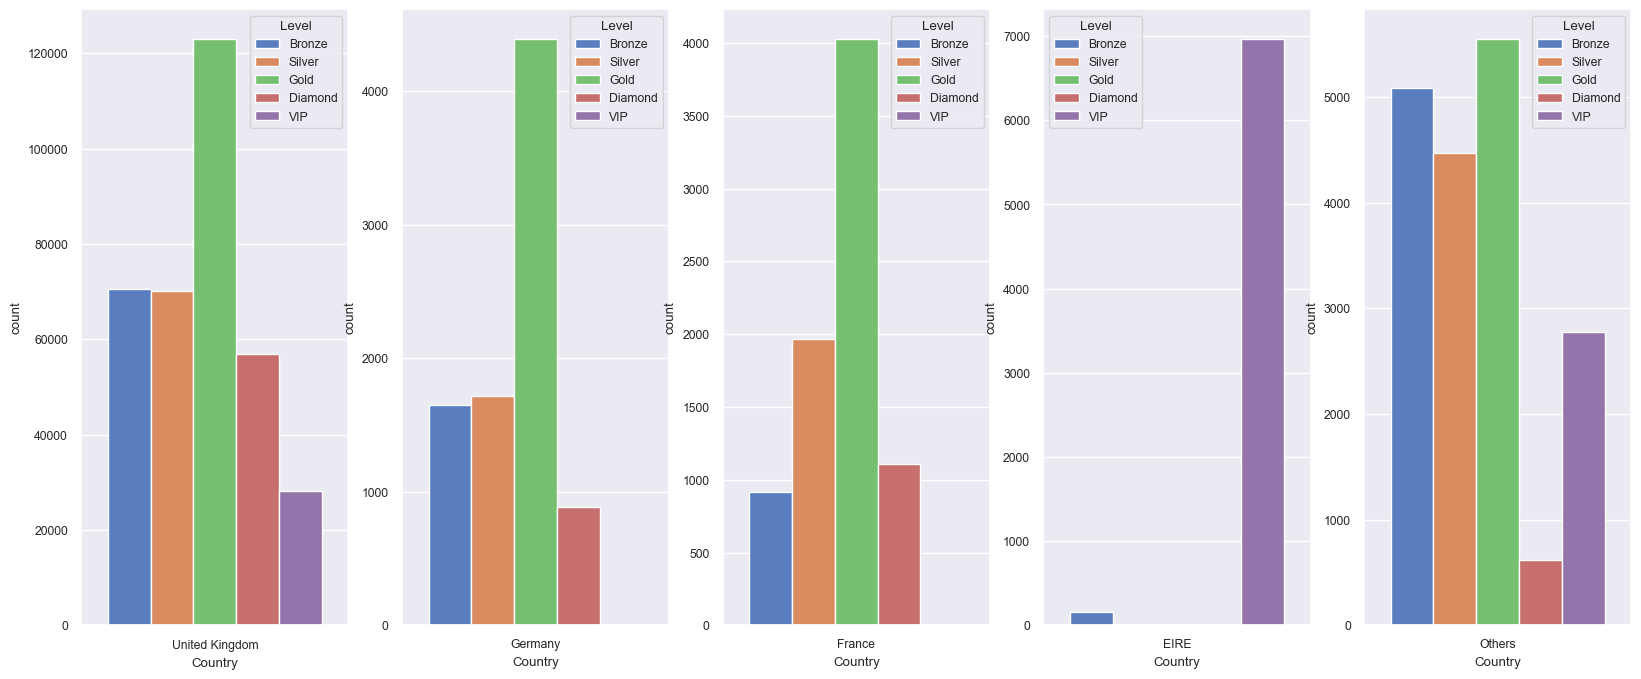

In [41]:
# 레벨로 세분화로 분석하였습니다.

fig, axes = plt.subplots(1, 5, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='Country', hue='Level', data=ci_rf_df[ci_rf_df['Country'] == 'United Kingdom'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Country', hue='Level', data=ci_rf_df[ci_rf_df['Country'] == 'Germany'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[2], x='Country', hue='Level', data=ci_rf_df[ci_rf_df['Country'] == 'France'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[3], x='Country', hue='Level', data=ci_rf_df[ci_rf_df['Country'] == 'EIRE'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[4], x='Country', hue='Level', data=ci_rf_df[ci_rf_df['Country'] == 'Others'], palette='muted', hue_order=order_columns)

#### 마케팅 전략
- 등급분류
  gold > branze=sliver > Diamond > VIP을 분류하였습니다.
 
- 나라 타겟 마케팅
영국이 가장 많은 인터넷 쇼핑몰을 사용하는 것으로 보아 영국에 마케팅과 이벤트를 통해 판매량을 높일 수 있습니다.
독일은 영국 보다는 작지만 도시 마케팅이나 프로모션을 통해 매출을 극대화 할 수 있습니다.
프랑시는 영국이랑 독이보다는 매출이 적지만, 여전히 마케팅을 통해서 매출을 높일 수가 있습니다.  
현재는 EIRE(아일랜드) 나라의 VIP등급이 보다 많은 것으로 보였고 아일랜드에서 살 수 있는 인터넷 쇼핑몰이 상당히 다른 나라에 의존적인점, 특히나 영국에 대한 의존도가 높아 영국과 아일랜드의 프로모션 및 이벤트를 통해 고객들의 만족도를 높일 필요가 있습니다.


- 등급별 마케팅  
고객들을 모두 고려하여 제품과 지역에 따른 다양한 프로모션 및 할인 이벤트를 제공해야 합니다. 이러한 마케팅 전략을 통해 제품 선호도와 나라 선호도를 고려한 타겟 마케팅을 실시하고, 각 등급의 고객들을 모두 고려한 다채로운 마케팅 활동을 펼쳐 고객들의 만족도를 높이고 매출을 증대시킬 수 있을 것으로 기대됩니다.

### 온라인 고객으로 판매 실적 수익률 RFM

- 매출 분석, 고객 세분화
- 지리적 분석 : 지리적 위치에 따른 구매 패턴을 분석하였습니다
- 판매 실적: 고객들의 성별과 나이에 대한 판매 실적을 분석하였습니다.

In [42]:
import pandas as pd

os_df = pd.read_csv('./datasets/Online Shop Customer Sales Data.csv')
os_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


In [43]:
os_df['Gender'] = os_df['Gender'].astype(object)
os_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


In [44]:
# 'Gender' 열을 'female'과 'male'로 매핑하여 변경
os_df['Gender'] = os_df['Gender'].map({0: 'male', 1: 'female'})
os_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,male,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,female,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,female,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,male,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,female,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,female,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,male,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,male,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,male,29.2,1,09.12.21,29.200,3,731,0,0,0


In [45]:
#날짜를 변환하겠다고 생각하여 해보았다.
os_df['Purchase_DATE'] = pd.to_datetime(os_df['Purchase_DATE'], dayfirst=True)
os_df.sort_values(['Purchase_DATE'], ascending=False)

/var/folders/6s/j_mx6zw928552yqj3z9c7fzw0000gn/T/ipykernel_1617/1571037826.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  os_df['Purchase_DATE'] = pd.to_datetime(os_df['Purchase_DATE'], dayfirst=True)


,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
11997,516305,29,male,31.7,3,2022-01-01,0.317,1,777,0,0,0
31084,535392,42,female,29.0,1,2022-01-01,29.000,3,1062,0,0,1
4228,508536,63,female,15.8,3,2022-01-01,12.956,2,854,0,0,1
18349,522657,19,female,59.1,4,2022-01-01,26.595,1,1014,3,0,0
2407,506715,56,male,39.5,6,2022-01-01,5.135,2,292,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64396,568704,32,female,0.5,6,2021-01-01,0.145,2,408,0,1,0
17342,521650,16,female,37.4,4,2021-01-01,22.066,1,953,0,0,0
30271,534579,49,female,18.4,2,2021-01-01,4.784,1,430,0,0,0
33366,537674,49,female,34.4,6,2021-01-01,28.552,1,133,1,1,1


In [46]:
os_df['Purchase_DATE'] = pd.to_datetime(os_df['Purchase_DATE'])

In [47]:
os_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer_id     65796 non-null  int64         
 1   Age             65796 non-null  int64         
 2   Gender          65796 non-null  object        
 3   Revenue_Total   65796 non-null  float64       
 4   N_Purchases     65796 non-null  int64         
 5   Purchase_DATE   65796 non-null  datetime64[ns]
 6   Purchase_VALUE  65796 non-null  float64       
 7   Pay_Method      65796 non-null  int64         
 8   Time_Spent      65796 non-null  int64         
 9   Browser         65796 non-null  int64         
 10  Newsletter      65796 non-null  int64         
 11  Voucher         65796 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 6.0+ MB


In [48]:
# 결측치는 없습니다.
os_df.isna().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [49]:
os_df.duplicated().sum()

0

In [50]:
os_df.sort_values(by='Purchase_DATE', ascending=False)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
11997,516305,29,male,31.7,3,2022-01-01,0.317,1,777,0,0,0
31084,535392,42,female,29.0,1,2022-01-01,29.000,3,1062,0,0,1
4228,508536,63,female,15.8,3,2022-01-01,12.956,2,854,0,0,1
18349,522657,19,female,59.1,4,2022-01-01,26.595,1,1014,3,0,0
2407,506715,56,male,39.5,6,2022-01-01,5.135,2,292,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64396,568704,32,female,0.5,6,2021-01-01,0.145,2,408,0,1,0
17342,521650,16,female,37.4,4,2021-01-01,22.066,1,953,0,0,0
30271,534579,49,female,18.4,2,2021-01-01,4.784,1,430,0,0,0
33366,537674,49,female,34.4,6,2021-01-01,28.552,1,133,1,1,1


In [51]:
# 오늘(2022-01-01)로부터 지난 구매 날짜 구하기
os_df['Purchase_DATE'] = pd.to_datetime(os_df['Purchase_DATE']).apply(lambda x: (pd.to_datetime('2022-01-01') - x).days)
os_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,male,45.3,2,193,24.915,1,885,0,0,0
1,504309,18,female,36.2,3,22,2.896,2,656,0,0,1
2,504310,52,female,10.6,1,293,10.600,0,761,0,1,0
3,504311,29,male,54.1,5,68,43.280,1,906,0,1,0
4,504312,21,female,56.9,1,109,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,female,10.9,4,320,6.213,1,894,0,0,0
65792,570100,33,male,29.3,1,330,29.300,0,722,0,0,0
65793,570101,50,male,25.4,5,64,23.114,3,424,0,0,0
65794,570102,56,male,29.2,1,23,29.200,3,731,0,0,0


In [52]:
os_df['Customer_id'].value_counts()

Customer_id
504308    1
548130    1
548164    1
548165    1
548166    1
         ..
526244    1
526245    1
526246    1
526247    1
570103    1
Name: count, Length: 65796, dtype: int64

In [53]:
# Recency
rfm_r = os_df.groupby('Customer_id')['Purchase_DATE'].min().reset_index()
rfm_r.columns = ['Customer_id', 'Recency']

# Frequency
rfm_f = os_df['Customer_id'].value_counts().reset_index()
rfm_f.columns = ['Customer_id', 'Frequency']

# Monetary
rfm_m = os_df.groupby('Customer_id')['Revenue_Total'].sum().reset_index()
rfm_m.columns = ['Customer_id', 'Monetary']

rfm = pd.merge(rfm_r, rfm_f, on='Customer_id')
rfm = pd.merge(rfm, rfm_m, on='Customer_id')

rfm

,Customer_id,Recency,Frequency,Monetary
0,504308,193,1,45.3
1,504309,22,1,36.2
2,504310,293,1,10.6
3,504311,68,1,54.1
4,504312,109,1,56.9
...,...,...,...,...
65791,570099,320,1,10.9
65792,570100,330,1,29.3
65793,570101,64,1,25.4
65794,570102,23,1,29.2


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [55]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,Customer_id,Recency,Frequency,Monetary
0,504308,0.471233,0.0,0.754209
1,504309,0.939726,0.0,0.601010
2,504310,0.197260,0.0,0.170034
3,504311,0.813699,0.0,0.902357
4,504312,0.701370,0.0,0.949495
...,...,...,...,...
65791,570099,0.123288,0.0,0.175084
65792,570100,0.095890,0.0,0.484848
65793,570101,0.824658,0.0,0.419192
65794,570102,0.936986,0.0,0.483165


In [56]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,Customer_id,Recency,Frequency,Monetary,TotalScore
0,504308,0.471233,0.0,0.754209,1.225442
1,504309,0.939726,0.0,0.601010,1.540736
2,504310,0.197260,0.0,0.170034,0.367294
3,504311,0.813699,0.0,0.902357,1.716056
4,504312,0.701370,0.0,0.949495,1.650865
...,...,...,...,...,...
65791,570099,0.123288,0.0,0.175084,0.298372
65792,570100,0.095890,0.0,0.484848,0.580739
65793,570101,0.824658,0.0,0.419192,1.243849
65794,570102,0.936986,0.0,0.483165,1.420151


In [57]:
os_rfm_df = pd.merge(os_df, rfm, on='Customer_id')
os_rfm_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Recency,Frequency,Monetary,TotalScore
0,504308,53,male,45.3,2,193,24.915,1,885,0,0,0,0.471233,0.0,0.754209,1.225442
1,504309,18,female,36.2,3,22,2.896,2,656,0,0,1,0.939726,0.0,0.601010,1.540736
2,504310,52,female,10.6,1,293,10.600,0,761,0,1,0,0.197260,0.0,0.170034,0.367294
3,504311,29,male,54.1,5,68,43.280,1,906,0,1,0,0.813699,0.0,0.902357,1.716056
4,504312,21,female,56.9,1,109,56.900,1,605,0,1,0,0.701370,0.0,0.949495,1.650865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,female,10.9,4,320,6.213,1,894,0,0,0,0.123288,0.0,0.175084,0.298372
65792,570100,33,male,29.3,1,330,29.300,0,722,0,0,0,0.095890,0.0,0.484848,0.580739
65793,570101,50,male,25.4,5,64,23.114,3,424,0,0,0,0.824658,0.0,0.419192,1.243849
65794,570102,56,male,29.2,1,23,29.200,3,731,0,0,0,0.936986,0.0,0.483165,1.420151


## 시각화 쪽

In [58]:
import numpy as np

l1, l2, l3, l4 = np.percentile(os_rfm_df['TotalScore'], [28, 50, 74, 90])
print(l1, l2, l3, l4)

0.7202619805359531 0.9605806927724736 1.2255661639223283 1.4679811816798118


In [59]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [60]:
def get_age_group(age):
    if age <= 20:
        return '10~20'
    elif age <= 30:
        return '20~30'
    elif age <= 40:
        return '30~40'
    elif age <= 50:
        return '40~50'
    else:
        return '50~60'

In [61]:
os_rfm_df['Level'] = os_rfm_df['TotalScore'].apply(get_level)
os_rfm_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Recency,Frequency,Monetary,TotalScore,Level
0,504308,53,male,45.3,2,193,24.915,1,885,0,0,0,0.471233,0.0,0.754209,1.225442,3
1,504309,18,female,36.2,3,22,2.896,2,656,0,0,1,0.939726,0.0,0.601010,1.540736,1
2,504310,52,female,10.6,1,293,10.600,0,761,0,1,0,0.197260,0.0,0.170034,0.367294,5
3,504311,29,male,54.1,5,68,43.280,1,906,0,1,0,0.813699,0.0,0.902357,1.716056,1
4,504312,21,female,56.9,1,109,56.900,1,605,0,1,0,0.701370,0.0,0.949495,1.650865,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,female,10.9,4,320,6.213,1,894,0,0,0,0.123288,0.0,0.175084,0.298372,5
65792,570100,33,male,29.3,1,330,29.300,0,722,0,0,0,0.095890,0.0,0.484848,0.580739,5
65793,570101,50,male,25.4,5,64,23.114,3,424,0,0,0,0.824658,0.0,0.419192,1.243849,2
65794,570102,56,male,29.2,1,23,29.200,3,731,0,0,0,0.936986,0.0,0.483165,1.420151,2


In [62]:
os_rfm_df['Level'] = os_rfm_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
os_rfm_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Recency,Frequency,Monetary,TotalScore,Level
0,504308,53,male,45.3,2,193,24.915,1,885,0,0,0,0.471233,0.0,0.754209,1.225442,Gold
1,504309,18,female,36.2,3,22,2.896,2,656,0,0,1,0.939726,0.0,0.601010,1.540736,VIP
2,504310,52,female,10.6,1,293,10.600,0,761,0,1,0,0.197260,0.0,0.170034,0.367294,Bronze
3,504311,29,male,54.1,5,68,43.280,1,906,0,1,0,0.813699,0.0,0.902357,1.716056,VIP
4,504312,21,female,56.9,1,109,56.900,1,605,0,1,0,0.701370,0.0,0.949495,1.650865,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,female,10.9,4,320,6.213,1,894,0,0,0,0.123288,0.0,0.175084,0.298372,Bronze
65792,570100,33,male,29.3,1,330,29.300,0,722,0,0,0,0.095890,0.0,0.484848,0.580739,Bronze
65793,570101,50,male,25.4,5,64,23.114,3,424,0,0,0,0.824658,0.0,0.419192,1.243849,Diamond
65794,570102,56,male,29.2,1,23,29.200,3,731,0,0,0,0.936986,0.0,0.483165,1.420151,Diamond


In [63]:
# 'Age' 열을 기반으로 'Age_Group' 열을 생성
os_rfm_df['Age_Group'] = os_rfm_df['Age'].apply(get_age_group)

In [64]:
os_rfm_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Recency,Frequency,Monetary,TotalScore,Level,Age_Group
0,504308,53,male,45.3,2,193,24.915,1,885,0,0,0,0.471233,0.0,0.754209,1.225442,Gold,50~60
1,504309,18,female,36.2,3,22,2.896,2,656,0,0,1,0.939726,0.0,0.601010,1.540736,VIP,10~20
2,504310,52,female,10.6,1,293,10.600,0,761,0,1,0,0.197260,0.0,0.170034,0.367294,Bronze,50~60
3,504311,29,male,54.1,5,68,43.280,1,906,0,1,0,0.813699,0.0,0.902357,1.716056,VIP,20~30
4,504312,21,female,56.9,1,109,56.900,1,605,0,1,0,0.701370,0.0,0.949495,1.650865,VIP,20~30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,female,10.9,4,320,6.213,1,894,0,0,0,0.123288,0.0,0.175084,0.298372,Bronze,20~30
65792,570100,33,male,29.3,1,330,29.300,0,722,0,0,0,0.095890,0.0,0.484848,0.580739,Bronze,30~40
65793,570101,50,male,25.4,5,64,23.114,3,424,0,0,0,0.824658,0.0,0.419192,1.243849,Diamond,40~50
65794,570102,56,male,29.2,1,23,29.200,3,731,0,0,0,0.936986,0.0,0.483165,1.420151,Diamond,50~60


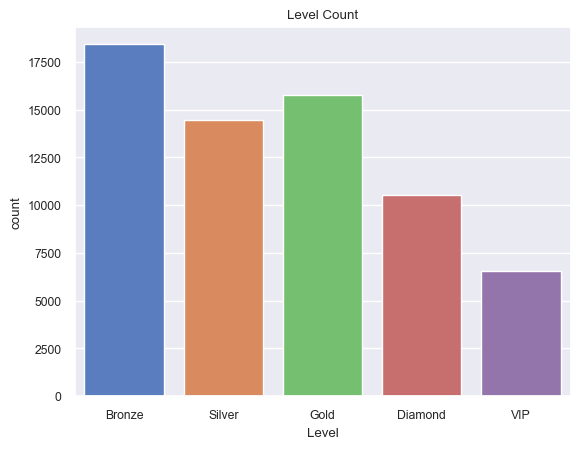

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x = 'Level', data=os_rfm_df, palette='muted', order=order)
plt.title('Level Count')
plt.show()

In [66]:
os_rfm_df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Recency,Frequency,Monetary,TotalScore,Level,Age_Group
0,504308,53,male,45.3,2,193,24.915,1,885,0,0,0,0.471233,0.0,0.754209,1.225442,Gold,50~60
1,504309,18,female,36.2,3,22,2.896,2,656,0,0,1,0.939726,0.0,0.601010,1.540736,VIP,10~20
2,504310,52,female,10.6,1,293,10.600,0,761,0,1,0,0.197260,0.0,0.170034,0.367294,Bronze,50~60
3,504311,29,male,54.1,5,68,43.280,1,906,0,1,0,0.813699,0.0,0.902357,1.716056,VIP,20~30
4,504312,21,female,56.9,1,109,56.900,1,605,0,1,0,0.701370,0.0,0.949495,1.650865,VIP,20~30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,female,10.9,4,320,6.213,1,894,0,0,0,0.123288,0.0,0.175084,0.298372,Bronze,20~30
65792,570100,33,male,29.3,1,330,29.300,0,722,0,0,0,0.095890,0.0,0.484848,0.580739,Bronze,30~40
65793,570101,50,male,25.4,5,64,23.114,3,424,0,0,0,0.824658,0.0,0.419192,1.243849,Diamond,40~50
65794,570102,56,male,29.2,1,23,29.200,3,731,0,0,0,0.936986,0.0,0.483165,1.420151,Diamond,50~60


<Axes: xlabel='Level', ylabel='Age'>

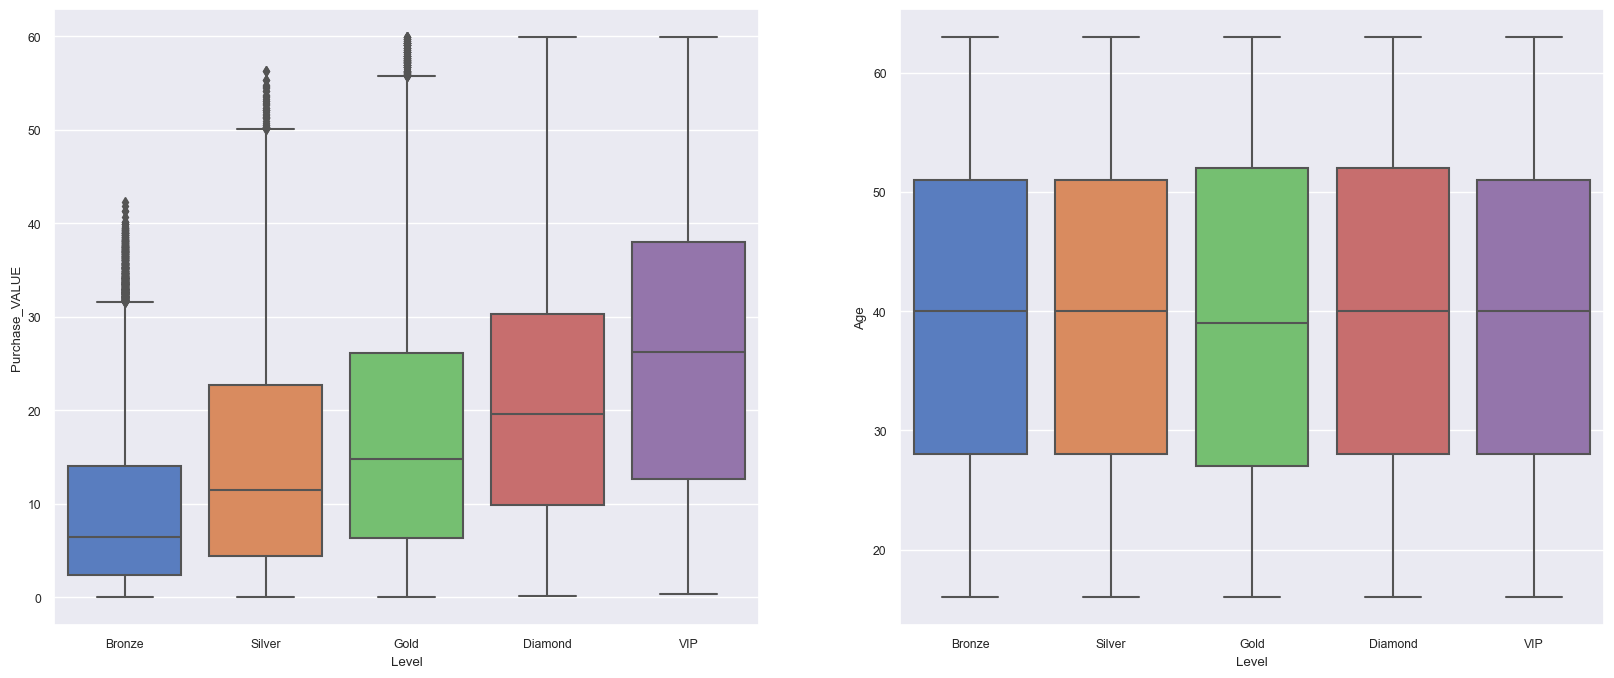

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 구매량을 알고 싶었습니다.
sns.boxplot(ax=axes[0], x='Level', y='Purchase_VALUE', data=os_rfm_df, palette='muted', order=order_columns)

# 레벨마다 나이떄가 어느정도 일지 궁금하다
sns.boxplot(ax=axes[1], x='Level', y='Age', data=os_rfm_df, palette='muted', order=order_columns)

In [68]:
os_rfm_df['Age'].value_counts()

Age
50    1458
38    1425
25    1422
39    1420
62    1410
49    1410
48    1410
32    1408
46    1406
45    1404
44    1403
56    1401
21    1397
63    1396
47    1393
57    1389
53    1388
61    1384
52    1383
51    1377
29    1377
28    1372
20    1372
27    1371
42    1369
30    1365
26    1364
41    1363
17    1362
54    1358
40    1350
35    1350
36    1346
33    1345
18    1343
43    1342
31    1342
23    1342
60    1340
55    1339
59    1338
34    1338
19    1336
16    1335
22    1328
37    1316
58    1307
24    1302
Name: count, dtype: int64

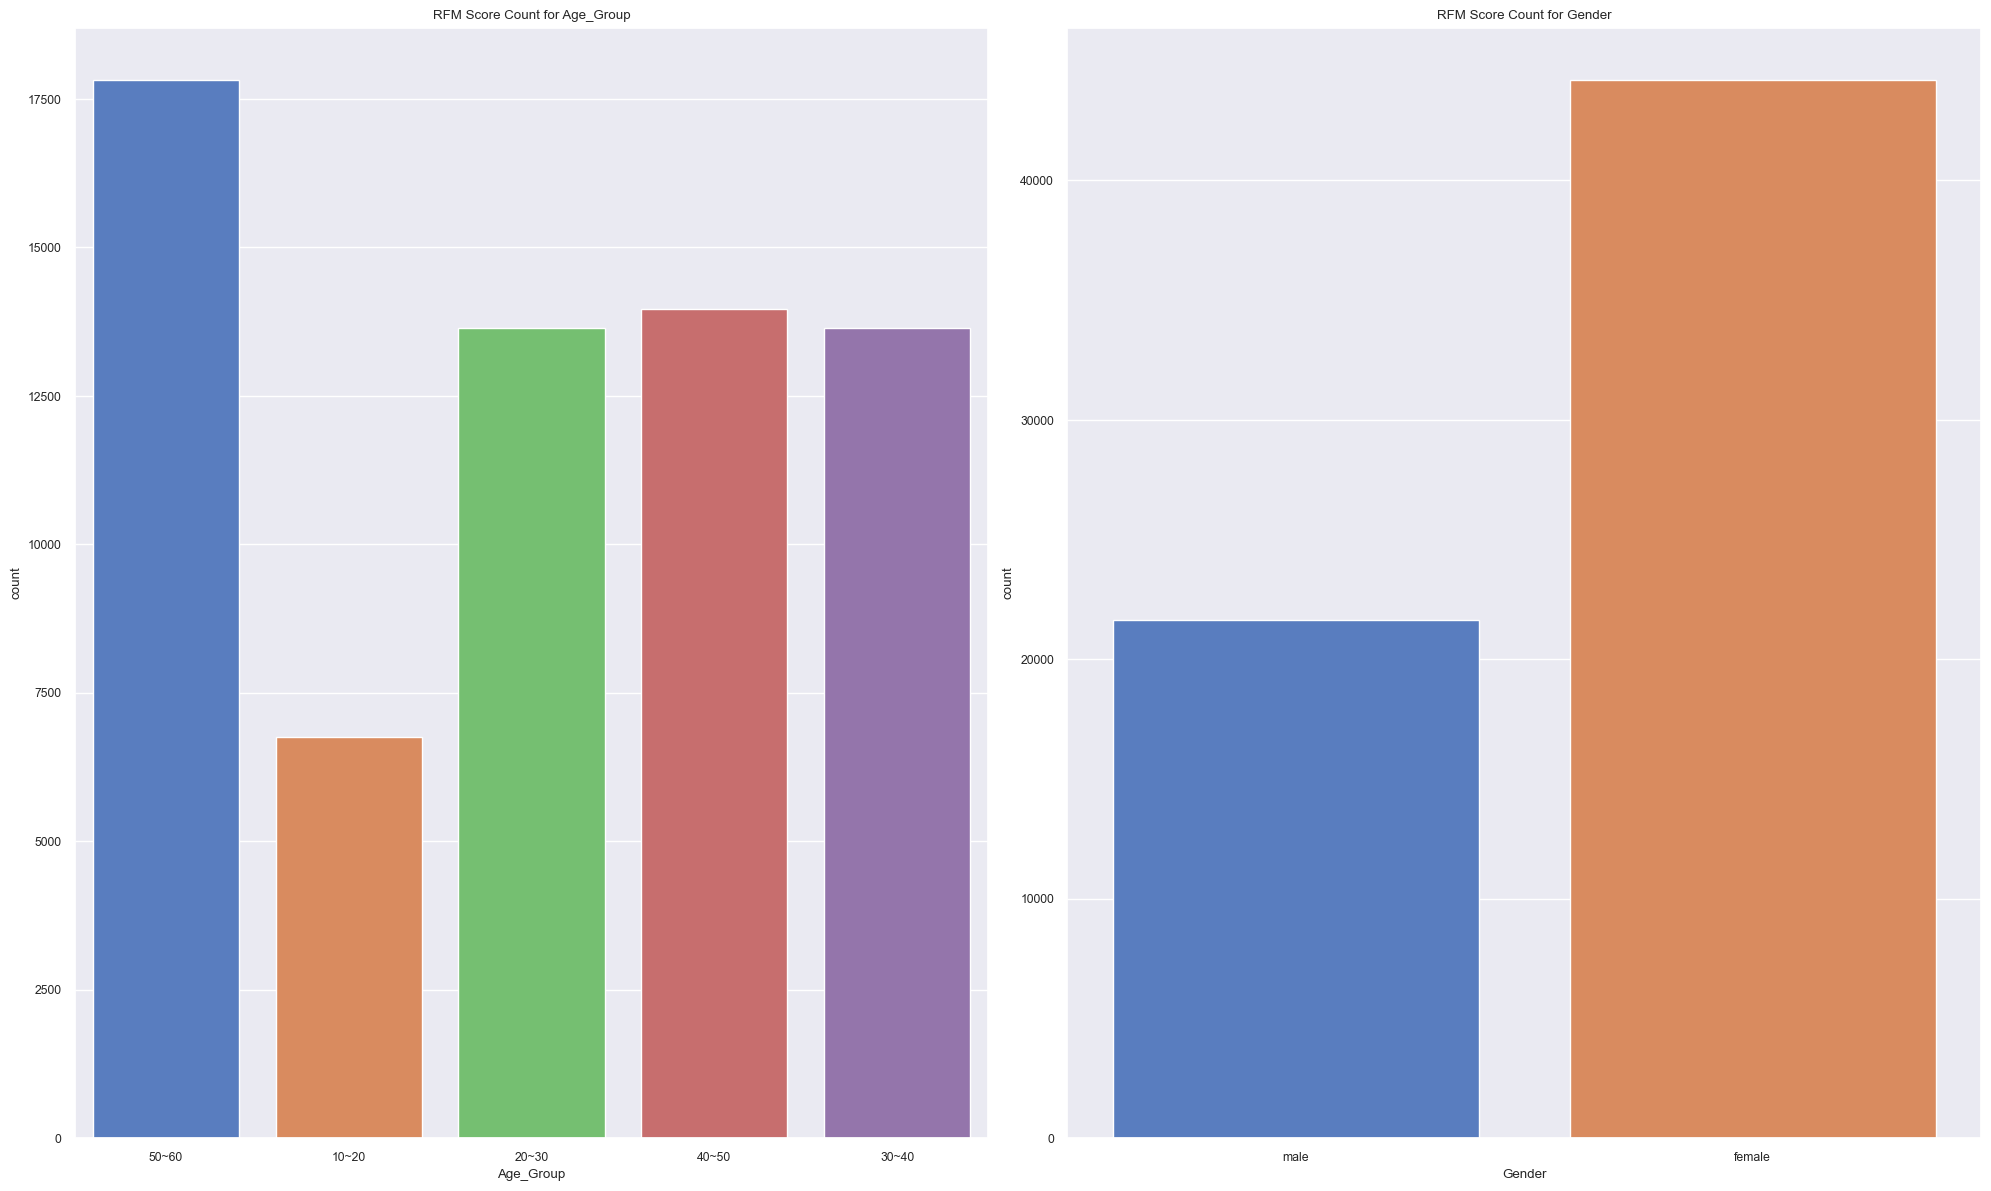

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 나이와 성별에 대한 구매 횟수를 그래프로 나타내었습니다.
# 전체 구매 목록 그래프
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

for i, col in enumerate(['Age_Group', 'Gender']):
    sns.countplot(ax=axes[i], x=col, data=os_rfm_df, palette='muted')
    axes[i].set_title(f'RFM Score Count for {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [70]:
os_rfm_df['Age_Group'].value_counts()

Age_Group
50~60    17810
40~50    13958
20~30    13640
30~40    13640
10~20     6748
Name: count, dtype: int64

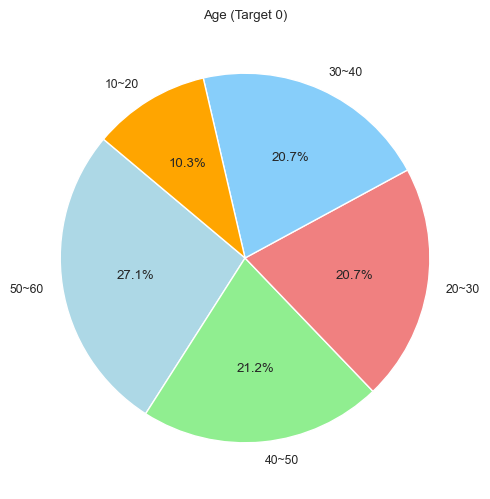

In [76]:
import matplotlib.pyplot as plt
labels = ['50~60','40~50', '20~30', '30~40','10~20']
sizes_target0 = [17810, 13958, 13640, 13640, 6748]  # 심장마비 발생률 x
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.pie(sizes_target0, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue' , 'orange'])
axes.set_title('Age (Target 0)')
plt.show()


In [72]:
os_rfm_df['Gender'].value_counts()

Gender
female    44172
male      21624
Name: count, dtype: int64

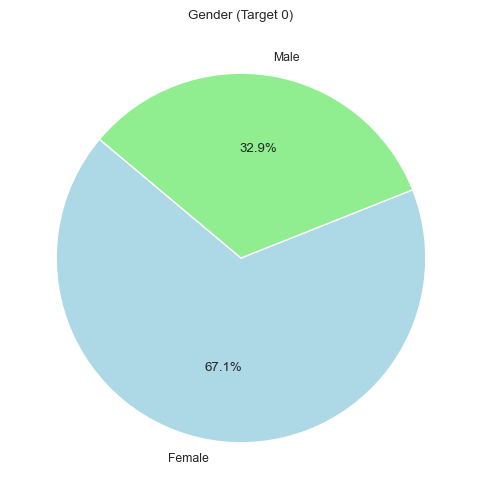

In [77]:
import matplotlib.pyplot as plt
labels = ['Female', 'Male']
sizes_target0 = [44172, 21624]  # 여성의 구매
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.pie(sizes_target0, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
axes.set_title('Gender (Target 0)')
plt.show()


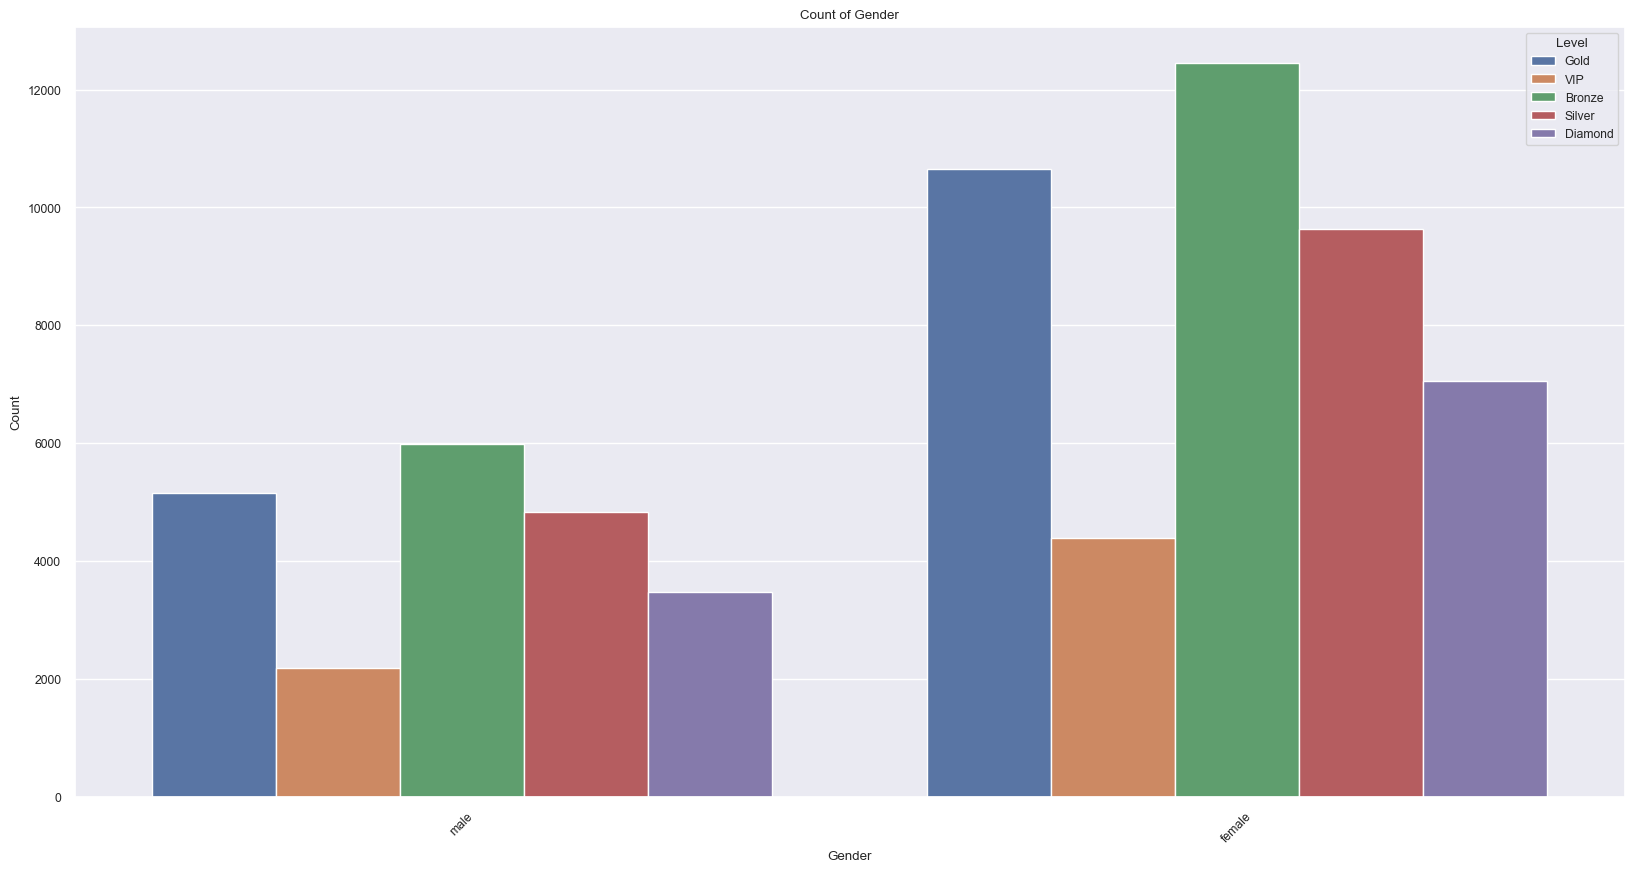

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 구매 목록 그래프
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 10))
sns.countplot(x='Gender',hue='Level', data=os_rfm_df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.xticks(rotation=45)
plt.show()

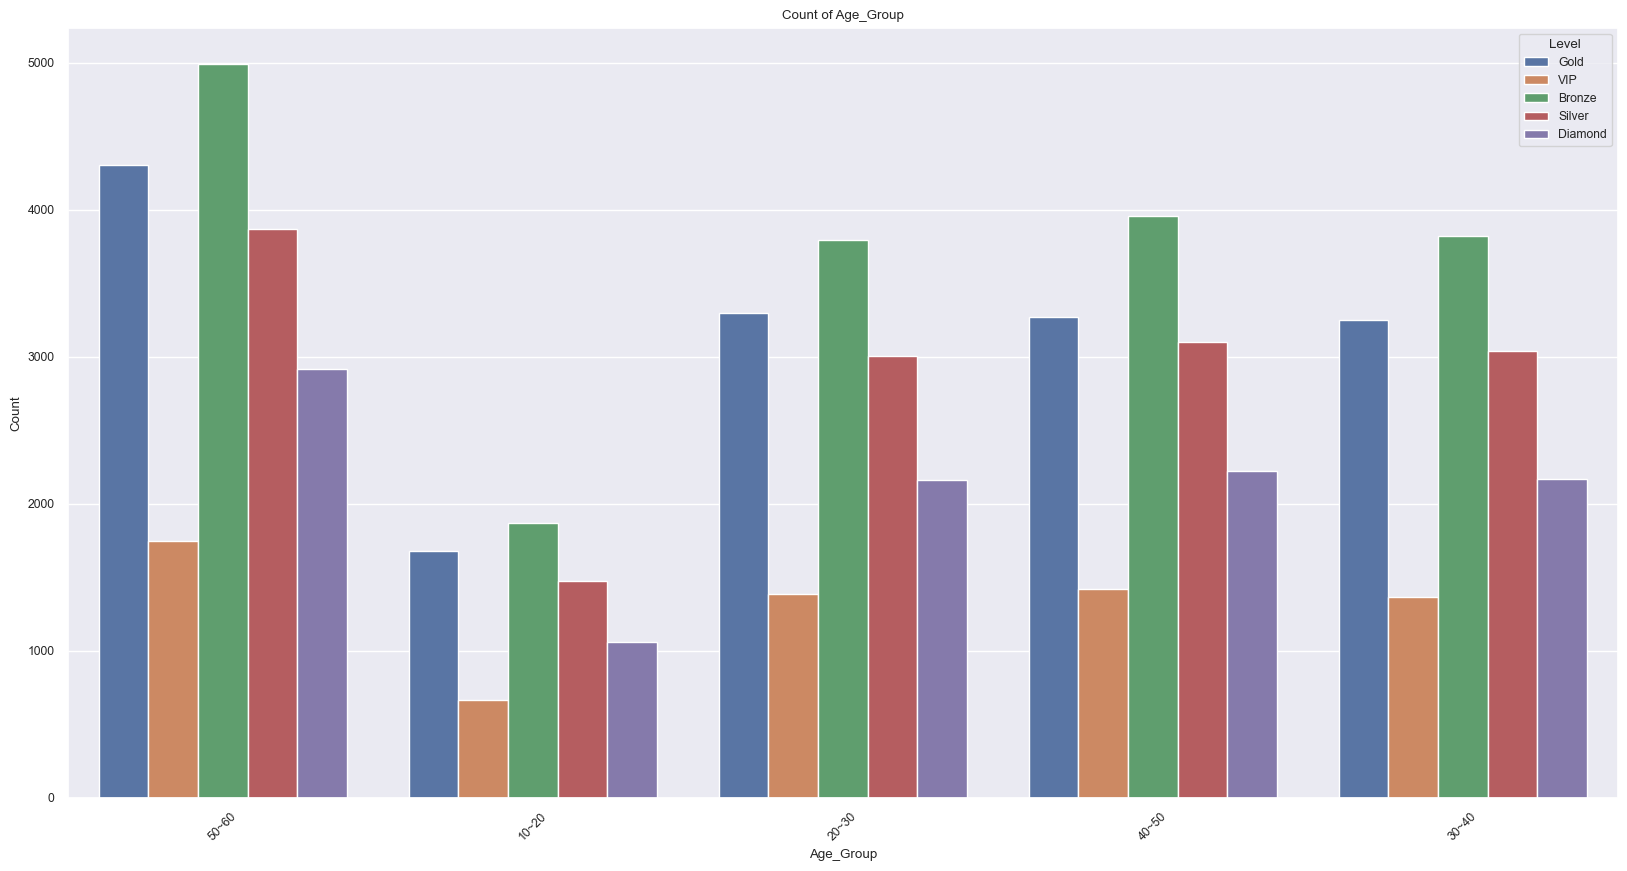

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 구매 목록 그래프
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 10))
sns.countplot(x='Age_Group',hue='Level', data=os_rfm_df)
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.title('Count of Age_Group')
plt.xticks(rotation=45)
plt.show()

#### 마케팅 전략
- 등급분류
  branze > gold > sliver > Diamond > VIP을 분류하였습니다.
 
- 나이 타겟 마케팅  
50대에서 60대가 가장 많은 인터넷 쇼핑몰을 사용하는 것으로 보아 마케팅과 이벤트를 통해 판매량을 높일 수 있습니다.  
또한 VIP 등급도 가장 높아 등급에 따라 적절한 이벤트와 프로모션을을 통해 매출을 극대화 할 수가 있습니다.  
40대에서 50대도 50에서 60대 보다는 작지만 제품에 마케팅이나 프로모션을 통해 매출을 극대화 할 수 있습니다.  
20대에서 30, 30대에서 40, 40대에서 50 VIP 등급이 비슷한 걸로 보아 인터넷 쇼핑몰이 상당히 의존적인 걸로 보아 가격 할인 이벤트 및 프로모션을를 통해 고객들의 만족도와 매출을 높일 수가 있습니다.  


- 성별 쪽 마케팅  
남성 보다는 여자가 더 많이 이용하여 마케팅을 활동을 남자 보다는 여자 쪽의 이벤트를 활용해 매출을 높이는 전략입니다.  
또한 여성은 프로모션을 통해 각각 타켓 마케팅을 실시하여 각 등급의 자유로운 마케팅과 이벤트를 통해 고객의 만족도를 높이고 매출을 크게 증대시킬 수 있을것입니다.

- 등급별 마케팅  
고객들을 모두 고려하여 제품과 지역에 따른 다양한 프로모션 및 할인 이벤트를 제공해야 합니다. 이러한 마케팅 전략을 통해 제품 선호도와 도시 선호도를 고려한 타겟 마케팅을 실시하고, 각 등급의 고객들을 모두 고려한 다채로운 마케팅 활동을 펼쳐 고객들의 만족도를 높이고 매출을 증대시킬 수 있을 것으로 기대됩니다.